# Titration for Alkalinity measurement

In [197]:
#titration plots for different solutions


from phreeqpython import PhreeqPython 

import numpy as np


from matplotlib import pyplot as plt

import pandas as  pd


#produce a solution with NaOH one in equilibrium with atmophere and the other one pure


# use the vitens database for all constants

# create new PhreeqPython instance
pp = PhreeqPython(database='vitens.dat')



# geneal phreeqc info

Note your input is  mol/L, so the density may be important. PHREEQC will
use the density to converting to mol/kgw, which are the units used for all
internal calculations (and all printout). Right now the density is 1.0.

In [198]:
# some unecessary style settings

plt.rcParams.update({'font.size': 22,
                     #font.weight':'bold',
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'lines.linewidth' :  4,
                     'axes.labelsize'  : 20.0,
                     'axes.titlesize':  20,
                     'figure.titlesize': 'x-large',
                     'legend.fontsize': 18.0,})



In [199]:
# Complex, allowing for more 'standard' PHREEQC input (Phreeqc example 3 -- Mixing)
solution2 = pp.add_solution({'units':'ppm',
                                 'pH': 8.22,
                                 'pe': 8.451,
                                 'density': 1.023,
                                 'temp': 25.0,
                                 'Ca': 412.3,
                                 'Mg': 1291.8,
                                 'Na': 10768.0,
                                 'K': 399.1,
                                 'Si': 4.28,
                                 'Cl': 19353.0,
                                 'Alkalinity': '141.682 as HCO3',
                                 'S(6)': 2712.0
                                })

In [200]:
#produce a solution with NaOH one in equilibrium with atmophere and the other one pure


# use the vitens database for all constants

# create new PhreeqPython instance
pp = PhreeqPython(database='vitens.dat')

#for differnt NaOH doses

temp=25

#concetration 50mmol/l 0.05mol/l
c=50

# Line 5: units concentration units

#units--Indicates default concentration units are entered on this line. Optionally, -u[ nits].

#concentration units --Default concentration units. Three groups of concentration units are allowed, concentration (1) per liter ("/L"), (2) per kilogram solution ("/kgs"), or (3) per kilogram water ("/kgw"). All concentration units for a solution must be within the same group. Within a group, either grams or moles may be used, and prefixes milli (m) and micro (u) are acceptable. Parts per thousand, "ppt"; parts per million, "ppm"; and parts per billion, "ppb", are acceptable in the "per kilogram solution" group. Default is mmol/kgw (millimoles per kilogram water).


# set the Sodium moles and produce charge balance for oH-

solution1=pp.add_solution_simple({'NaOH':c},temperature=temp, units='mmol')



#concentration CO2
p=415 # ppm

#partial pressure pCO2 in atm
pCO2=p*1e-6 


#phreeqc always uses log10 values
input_pCO2=np.log10(pCO2)
    
    
# equalize solution with CO2
# equilibrium with atmosphere
solution1.equalize(['CO2(g)'], [input_pCO2])


#take just a part of this solution



solution2=pp.add_solution_simple({'NaOH':c},temperature=temp, units='mmol')


#acid used for titration
# 1 liter of this solution
solution_acid=pp.add_solution_simple({'HCl':20},temperature=temp, units='mmol')



In [201]:
solution1

In [202]:
solution2

In [203]:
# Calculate the total volume of the mixed solution
total_volume = 100.0  # ml

# Calculate the volumes of each solution to mix
nacl_volume = total_volume * 0.6
naoh_volume = total_volume * 0.4

# Create a mixture of the two solutions

#volumetric or weight based mix
mix= solution1 * 0.5 + solution_acid * 0.5



In [204]:
# add acid stepwise 

# acid steps
dx=0.1 #ml


pH_s1=[]

pH_s2=[]

acid_s1=[]

acid_s2=[]

for acid in range(600):
    
    pH_s1.append(solution1.pH)
    
    pH_s2.append(solution2.pH)

    acid_s1.append(acid*0.1)

    acid_s2.append(acid*0.1)
    
    #solution1=solution1+dx*solution_acid
    
    solution1.add('HCl',0.1, 'mmol') # add 1 mmol of 
    
    
    
    solution2.add('HCl',0.1, 'mmol') # add 1 mmol of 
    
    
    


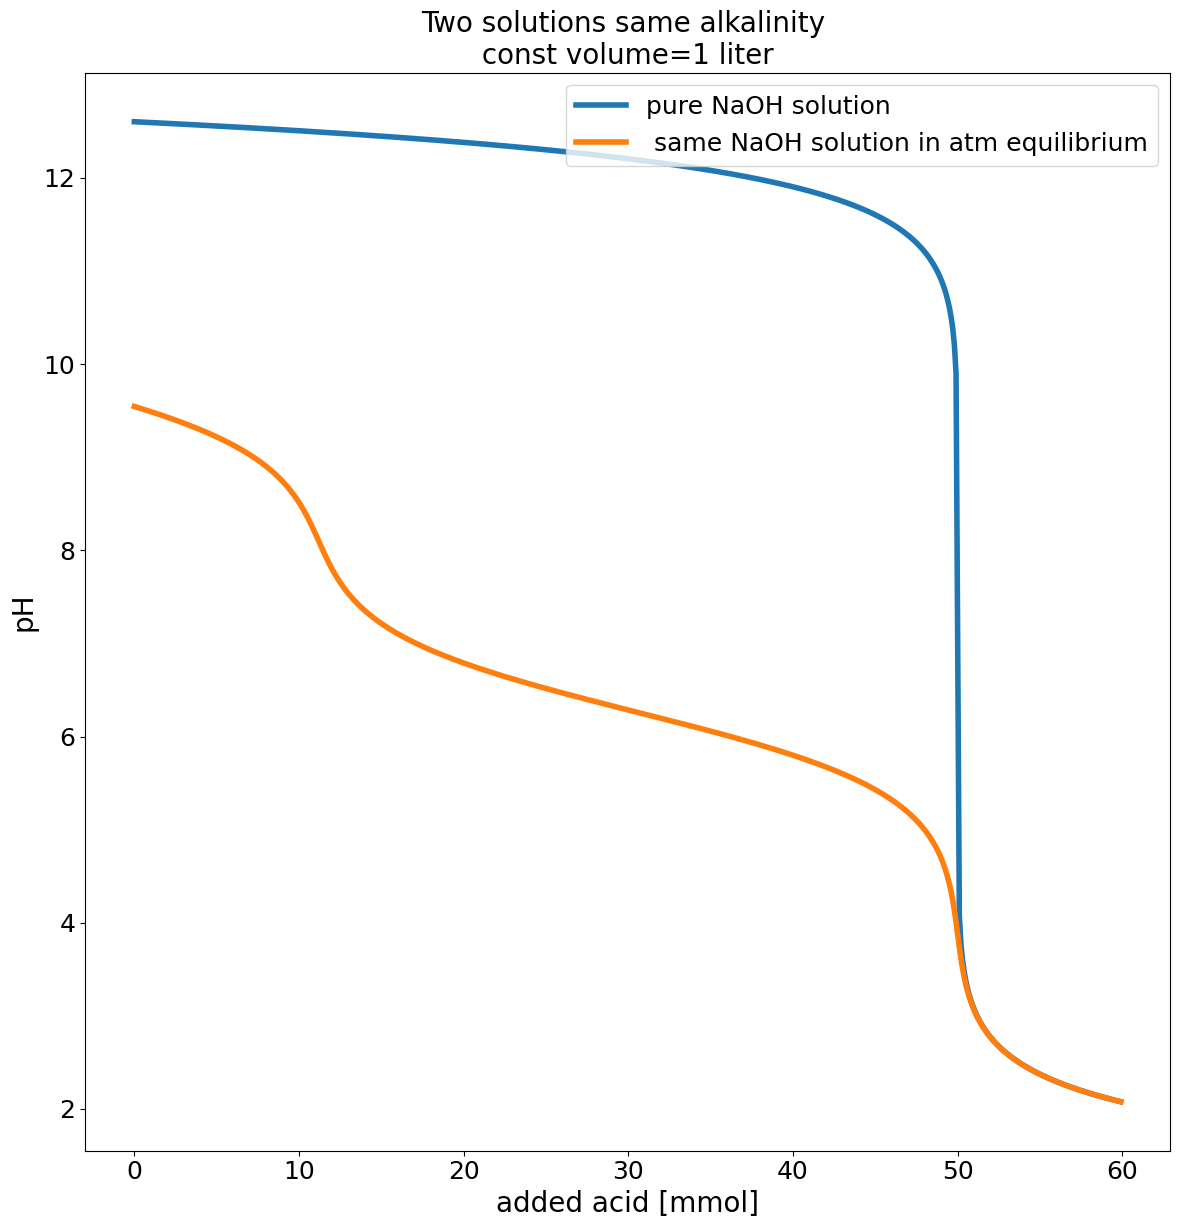

In [205]:
fig = plt.figure(figsize=[14,14])

plt.plot(acid_s2,pH_s2, label='pure NaOH solution')

plt.plot(acid_s1,pH_s1, label=' same NaOH solution in atm equilibrium')



plt.ylabel('pH')

plt.xlabel('added acid [mmol]')

plt.legend(loc='upper right')

plt.title('Two solutions same alkalinity \n const volume=1 liter ')


plt.savefig('titration-plot.pdf')  

### Resize/Rescale every input
Because phreeqc is always calculating reactions with 1 Liter I need to resize all my imputs to model the concentrations and amounts per 1 Liter

# Example of mixing two solutions

In [206]:
solution1 = pp.add_solution_simple({'NaCl':1})
solution2 = pp.add_solution_simple({'NaCl':3})
# make a solution of 50% solution 1 and 50% solution 2:
solution3 = solution1 * 0.5 + solution2 * 0.5
# make a solution by mixing solution 1 and 2 together
solution4 = solution1 + solution2

# Titration add acid volume instead of acid moles
This approach includes the dilution that is applied by adding the acid volume. Not just the moles of acid are added.
Here the solutions are mixed instead of adding moles of acid.

### produce the solutions



In [207]:
# set the Sodium moles and produce charge balance for oH-

solution1=pp.add_solution_simple({'NaOH':c},temperature=temp, units='mmol')


#concentration CO2
p=415 # ppm

#partial pressure pCO2 in atm
pCO2=p*1e-6 


#phreeqc always uses log10 values
input_pCO2=np.log10(pCO2)
    
    
# equalize solution with CO2
# equilibrium with atmosphere
solution1.equalize(['CO2(g)'], [input_pCO2])


#take just a part of this solution

solution2=pp.add_solution_simple({'NaOH':c},temperature=temp, units='mmol')


#acid used for titration
# 1 liter of this solution
# like tiamo 0.02 mol/l

solution_acid=pp.add_solution_simple({'HCl':20},temperature=temp, units='mmol')


#pure water for dilution 
solution_zero = pp.add_solution_simple({},temperature=temp)


# Dilute the solutions before titration

In [208]:
# take a subsmaple and fill up to a target volume

target_volume= 30 #ml

sample_volume= 2#ml 

#the dilution factor
dilution=target_volume/sample_volume


f1=sample_volume/target_volume

f2=(target_volume-sample_volume)/target_volume

# example 50% / 50%

solution1=solution1*f1+solution_zero*f2

solution2=solution2*f1+solution_zero*f2

In [209]:



# add acid stepwise 

# acid steps (like tiamo )
dx=0.1 #ml


pH_s1=[]

pH_s2=[]

acid_s1=[]

acid_s2=[]

volumes=[]

#starting volume of the titration
v_start=30.0 #ml
v=30.0 #ml

for item in range(100):
    
    pH_s1.append(solution1.pH)
    
    pH_s2.append(solution2.pH)

    acid_s1.append(item*dx)

    acid_s2.append(item*dx)
    
    volumes.append(v)
    
    #solution1=solution1+dx*solution_acid

    # total volume (phreeqc always 1 liter)
    
    
    #resize the inputs to 1 liter 
    
    #numbers in ml
    total=v+dx
    
    #mixing fractions (they are always constant anyway)
    f1=v/total
    
    f2=dx/total
    
    #mix solutions
    
    solution1=solution1*f1+solution_acid*f2
    
    #solution1.add('HCl',0.1, 'mmol') # add 1 mmol of 
    
    solution2=solution2*f1+solution_acid*f2
    
    #for the next iteration the total becomes the new volume
    v=total
    
    
    
    

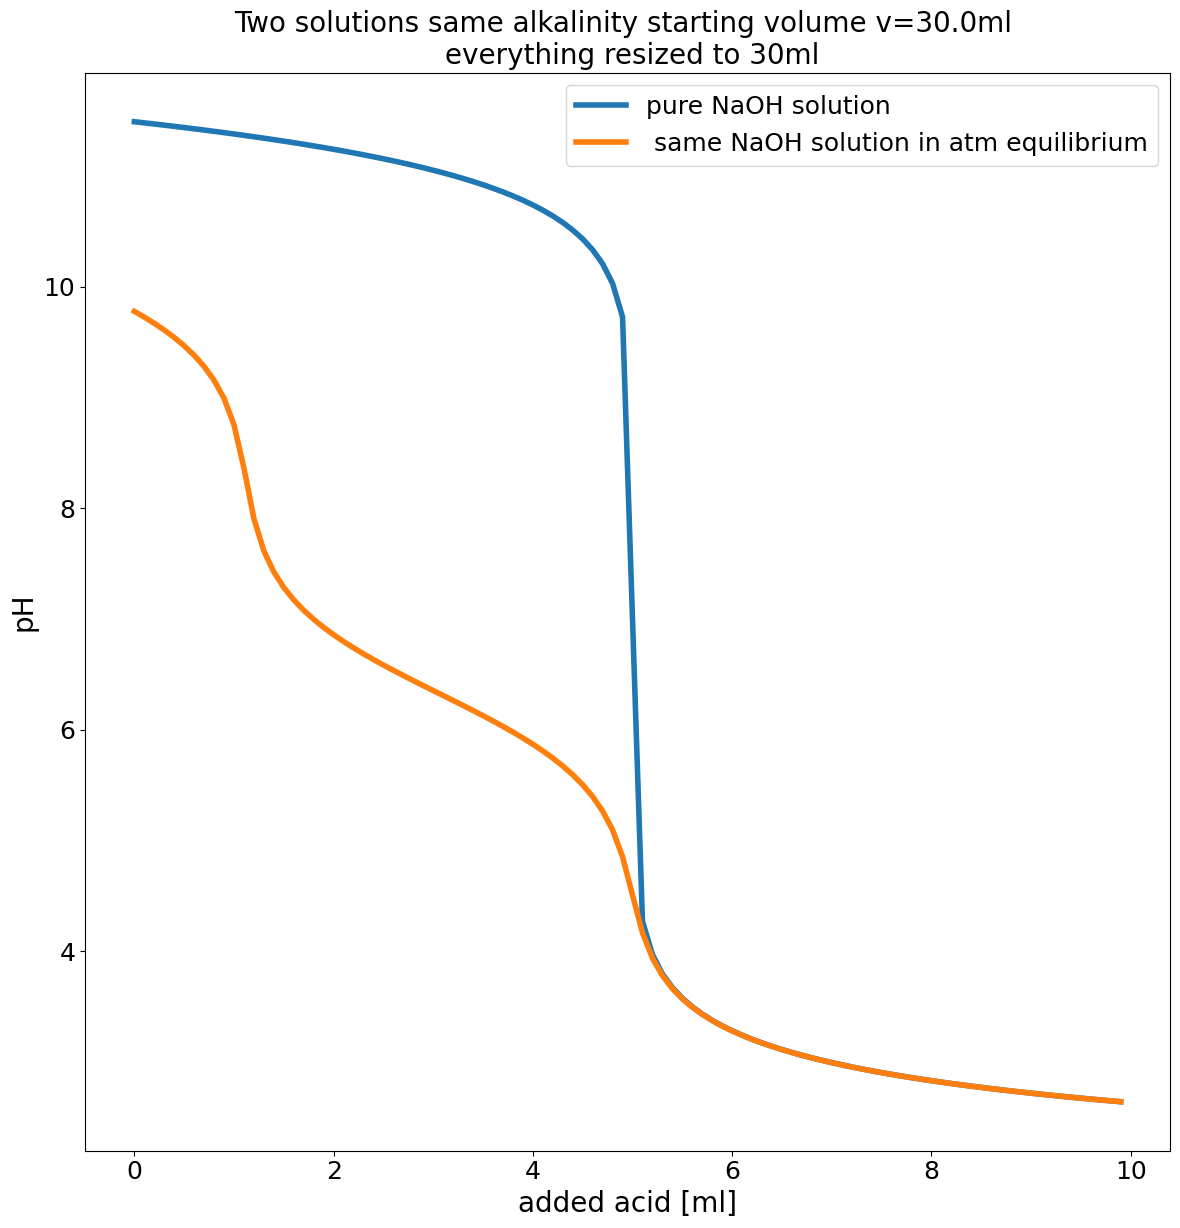

In [210]:
fig = plt.figure(figsize=[14,14])

plt.plot(acid_s2,pH_s2, label='pure NaOH solution')

plt.plot(acid_s1,pH_s1, label=' same NaOH solution in atm equilibrium')



plt.ylabel('pH')

plt.xlabel('added acid [ml]')

plt.legend(loc='upper right')

plt.title('Two solutions same alkalinity starting volume v={}ml \n everything resized to 30ml'.format(v_start))


plt.savefig('titration-plot.pdf')  

## Alkalinity calculation with the titration data
Calculate gran values for the (acid volume, pH) pairs

https://en.wikipedia.org/wiki/Gran_plot

In [211]:
#calculate gran value

gran_s1=[]

gran_s2=[]

for item in range(100):
    gran_s1.append(10000*((acid_s1[item]+v_start)/v_start)*10**(-pH_s1[item]))
    
    gran_s2.append(10000*((acid_s2[item]+v_start)/v_start)*10**(-pH_s1[item]))

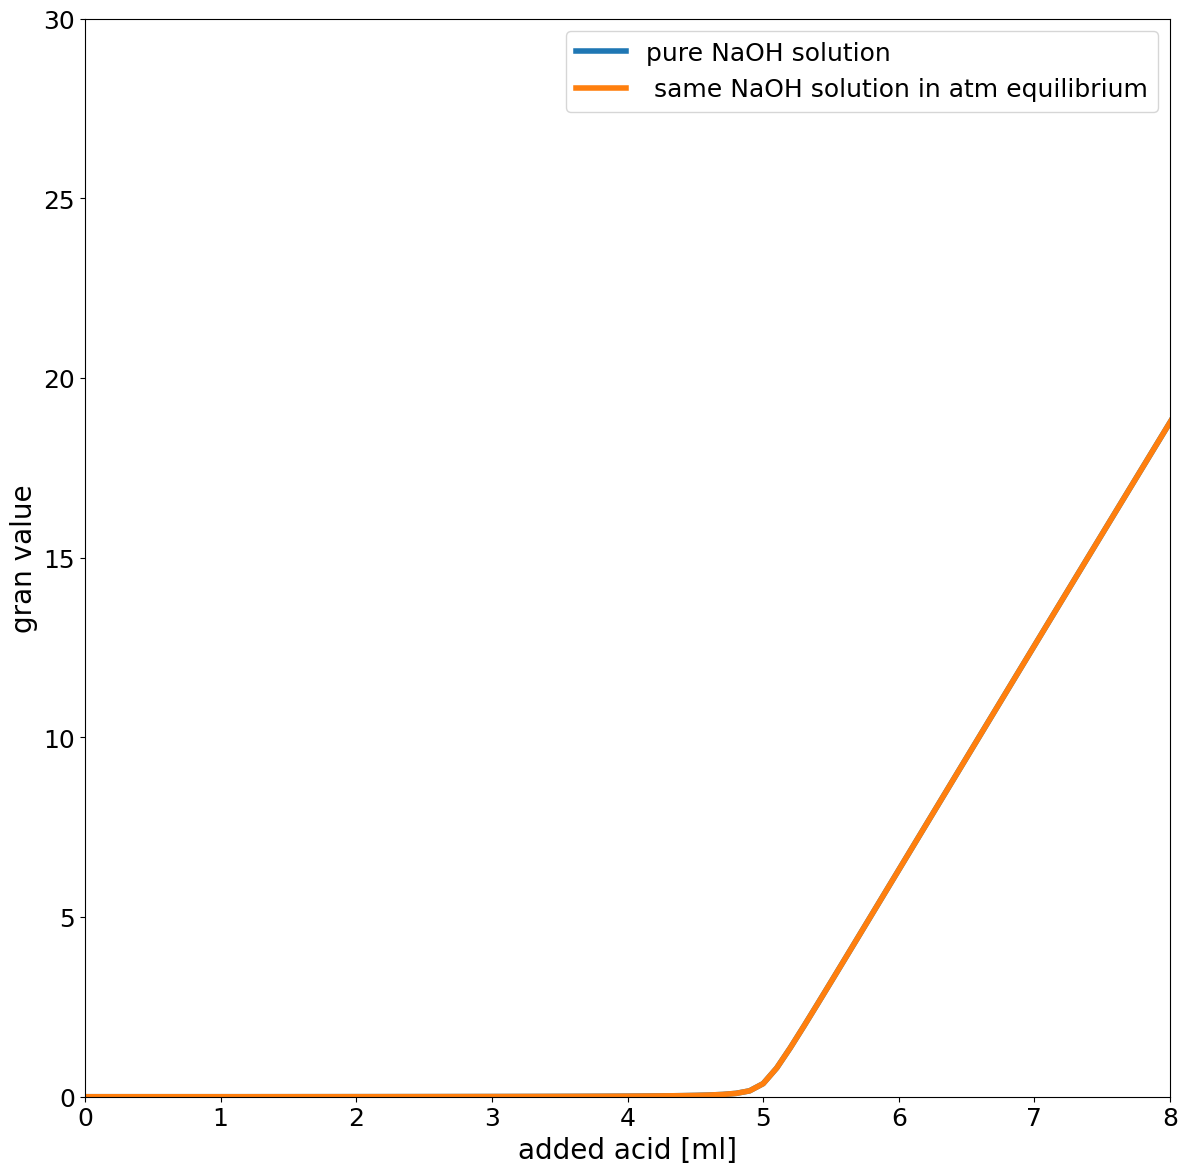

In [212]:
# plot the gran function against acid volume

fig = plt.figure(figsize=[14,14])

plt.plot(acid_s2,gran_s2,label='pure NaOH solution')

plt.plot(acid_s1,gran_s1, label=' same NaOH solution in atm equilibrium')

plt.ylim([0,30])
plt.xlim([0,8])


plt.xlabel('added acid [ml]')

plt.ylabel('gran value')

plt.legend()

# Here one can use a linear regression to find the equivalence point automatically
The beginning of the linear area is around 5mL  = 0.005 L

Thus acid buffering capacity per liter of the sample is

Dilution=15 

TA= (0.005L*0.02 mol/L  / 0.03 L)*Dilution = 50meq/L



